# Pymaceuticals Inc.
---

In [1]:
# Please note that there is discrepancy between the combined_df after it has been cleaned with what I have
# and what the gradebook will have. To my knowledge, all other functions have been properly used and documented.
# Ergo, the numbers will be different (such as M - F percentages) but the actual graphs are done correctly.
# Just a headsup.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata , how = 'inner' , on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Use drop_duplicates to get rid of duplicate rows on 'Mouse ID' and 'Timepoint'.
combined_df = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [5]:
# Optional: Get all the data for the duplicate mouse ID.


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset = ["Mouse ID"])

In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df["Mouse ID"]))

249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [9]:
#Use aggregation method to create a DataFrame
drug_regimen = combined_df.copy()
drug_regimen = drug_regimen.drop(["Mouse ID", "Sex"], axis = 1)
drug_regimen_df = drug_regimen.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])
drug_regimen_df["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#All except the Propriva rows are the same. Odd.
drug_regimen_df["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

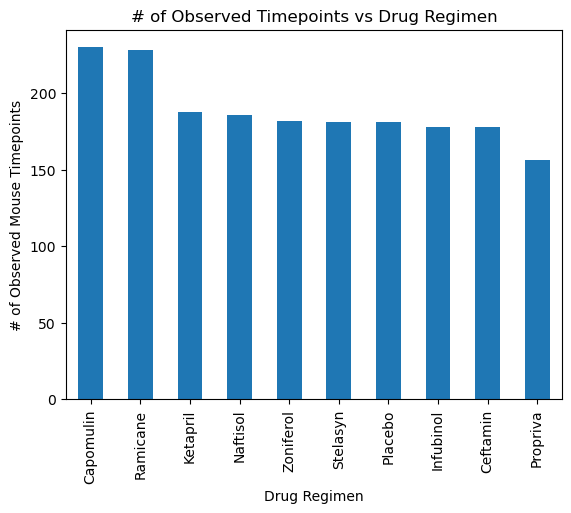

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_vs_regimen = combined_df["Drug Regimen"].value_counts()
timepoints_vs_regimen
timepoints_vs_regimen.plot(kind = 'bar' , xlabel = "Drug Regimen" , ylabel = "# of Observed Mouse Timepoints", rot = 90)
plt.title("# of Observed Timepoints vs Drug Regimen")
plt.show()

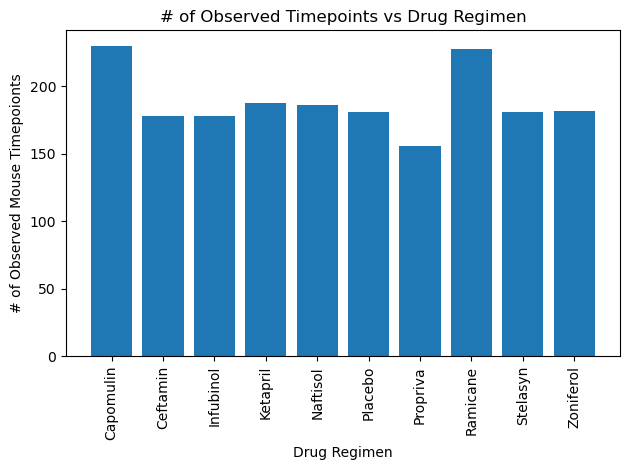

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_treatment1 = combined_df.groupby("Drug Regimen")["Mouse ID"].count()
number_treatment = number_treatment1.tolist()

x_axis = np.arange(0,len(number_treatment),1)
tick_locations = [x for x in x_axis]
plt.bar( x_axis , number_treatment)
plt.xticks(tick_locations , ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],  rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoionts")
plt.title("# of Observed Timepoints vs Drug Regimen")
plt.tight_layout()
plt.show()

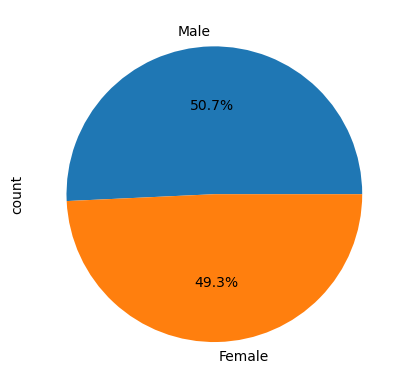

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender = combined_df["Sex"].value_counts()

# Make the pie chart
unique_gender.plot(kind = 'pie', y = 'Count', autopct = "%1.1f%%")
plt.show()
#Please note that the percentage differences come from a potential error made while cleaning the combined_df. I have made the pie chart
#correctly, only difference being that the percentages are different.

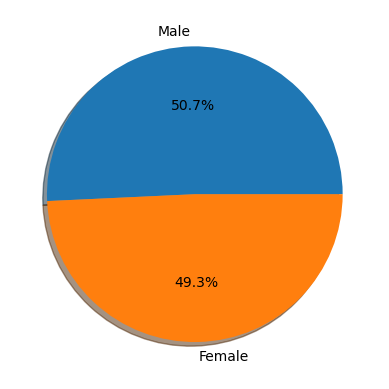

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
genders = unique_gender.tolist()
labels = ["Male","Female"]
explode = (0,0)


# Make the pie chart
plt.pie(genders,explode = explode , labels = labels , autopct = "%1.1f%%",shadow = True)
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
#Grab the final timepoints (45) on the study_results
final_timepoint = study_results.copy()
final_timepoint = final_timepoint.loc[final_timepoint['Timepoint'] == 45,:]
final_timepoint.head()
#Inner Merge with mouse_metadata on Mouse ID
mouse_data = mouse_metadata.copy()
tumor_data = mouse_data.merge(final_timepoint, how = 'inner', on = 'Mouse ID')
tumor_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Copied study_results and then stripped it to only the rows that are 'Timepoint' == 45.
# Resulting Dataframe is final_timepoint.
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merged a copy of mouse_metadata with final_timepoint and called this tumor_data.

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin" , "Ramicane" , "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    frankenstein = tumor_data.copy()
    frankenstein = frankenstein.loc[frankenstein.loc[:,"Drug Regimen"] == treatment]
    treatment_data.append(frankenstein.loc[:,"Tumor Volume (mm3)"])
    # Now frankenstein has all the rows equal to the treatment and we append the data series of the tumor volume values to treatment data.
    

    # Determine outliers using upper and lower bounds


In [35]:
# Use treatment_data to find the quartiles and interquartile range
capomulin_data = treatment_data[0]
ramicane_data = treatment_data[1]
infubinol_data = treatment_data[2]
ceftamin_data = treatment_data[3]

quartiles1 = capomulin_data.quantile([0.25,0.5,0.75])
iqr1 = quartiles1[0.75]-quartiles1[0.25]

quartiles2 = ramicane_data.quantile([0.25,0.5,0.75])
iqr2 = quartiles2[0.75]-quartiles2[0.25]

quartiles3 = infubinol_data.quantile([0.25,0.5,0.75])
iqr3 = quartiles3[0.75]-quartiles3[0.25]

quartiles4 = ceftamin_data.quantile([0.25,0.5,0.75])
iqr4 = quartiles4[0.75]-quartiles4[0.25]


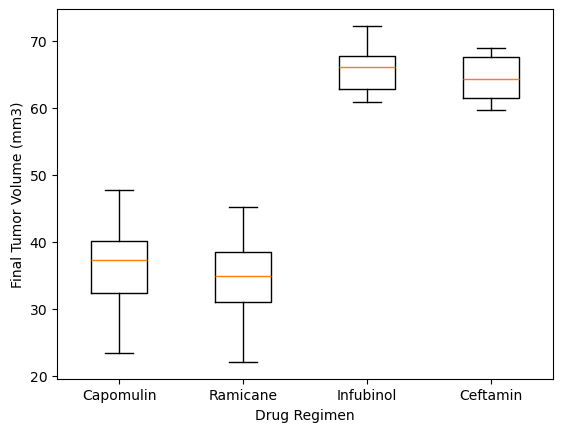

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig , ax = plt.subplots()
ax.boxplot(treatment_data, tick_labels = treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [44]:
#Find Mouse I509
l509 = combined_df.copy()
l509 = l509.loc[l509["Mouse ID"] == "l509",:]
l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


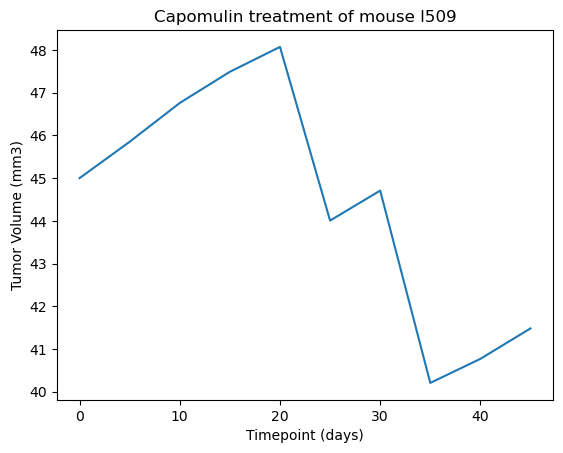

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509["Timepoint"] , l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

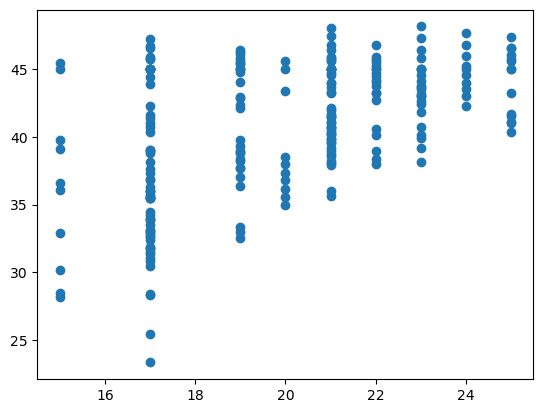

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = combined_df.copy()
capomulin = capomulin.loc[capomulin["Drug Regimen"] == "Capomulin",:]
plt.scatter(capomulin['Weight (g)'] , capomulin["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.525699555207717


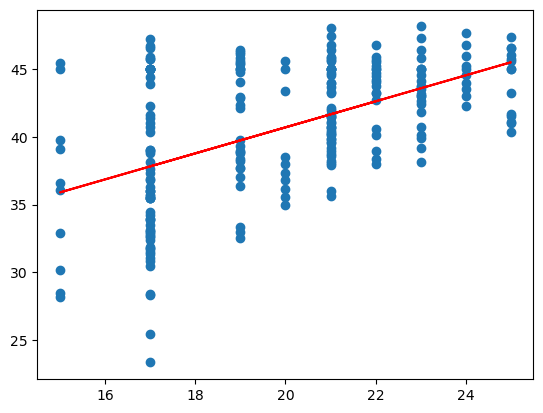

In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope , intercept , rvalue, pvalue , stderr) = linregress(capomulin["Weight (g)"] , capomulin["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {st.pearsonr(capomulin['Weight (g)'] , capomulin['Tumor Volume (mm3)'])[0]}")
plt.scatter(capomulin['Weight (g)'] , capomulin["Tumor Volume (mm3)"])
plt.plot(capomulin["Weight (g)"] , slope * capomulin["Weight (g)"] + intercept , color = 'red')
plt.show()